***Importing libraries***

In [1]:
import urllib.request
from bs4 import BeautifulSoup
import time
from fake_useragent import UserAgent
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Scraping the links of cars from each page

***Main links for iteration***

In [51]:
url1 = "https://kolesa.kz"

url2_alm = "https://kolesa.kz/cars/region-almatinskaya-oblast/?page={}" #For Almaty state we gathered 1500 links
url3_alm = "https://kolesa.kz/cars/region-almatinskaya-oblast"

url2_akm = "https://kolesa.kz/cars/region-akmolinskaya-oblast/?page={}" #For Akmola st. 500
url3_akm = "https://kolesa.kz/cars/region-akmolinskaya-oblast/"

url2_man = "https://kolesa.kz/cars/region-mangistauskaya-oblast/?page={}" #For Mangistau st. 150
url3_man = "https://kolesa.kz/cars/region-mangistauskaya-oblast/"

url2_vos = "https://kolesa.kz/cars/region-vostochnokazakhstanskaya-oblast/?page={}" #For East Kaz st. 250

***How does iteraion process of obtaining links of cars from each page look like?***

In [52]:
car_links = []

for i in range(1, 500): #We set needed amount of pages which we would like to scrape
    ua = UserAgent()
    headers = {'User-Agent': f'{ua.random}'}
    if i == 1:
        request = urllib.request.Request(url3, headers=headers)
        source = urllib.request.urlopen(request, timeout=8.5).read()
        soup = BeautifulSoup(source, features="html.parser")
        cards = soup.find_all("div", class_="a-list__item")
    
        for card in cards:
            car_link = card.find('a', class_='a-card__link')
            if car_link is not None:
                car_links.append(url1 + car_link.get('href'))
    else:
        request = urllib.request.Request(url2.format(i), headers=headers)
        source = urllib.request.urlopen(request, timeout=8.5).read()
        soup = BeautifulSoup(source, features="html.parser")
        cards = soup.find_all("div", class_="a-list__item")
    
        for card in cards:
            car_link = card.find('a', class_='a-card__link')
            if car_link is not None:
                car_links.append(url1 + car_link.get('href'))
    time.sleep(8.5)

***Deleting duplicates from obtained list of car links***

In [47]:
mylist = list(dict.fromkeys(car_links))
print(len(mylist))

4819


***Saving the each obtained list as a file for future summing all of them***

In [ ]:
with open("car_links_1_500_alm", "wb") as fp:   #Pickling
    pickle.dump(car_links_1_500_upd, fp)

# Creating the list of 30K+ links of cars

***Here we call obtained lists***

In [2]:
with open("car_links_1_500_alm", "rb") as fp:
    list_alm_500 = pickle.load(fp)

with open("car_links_500_1000_alm_dimash", "rb") as fp2:
    list_alm_1000 = pickle.load(fp2)

with open("car_links_1_500_akm_Arlan", "rb") as fp3:
    list_akm_500 = pickle.load(fp3)

with open("car_links_1_150_man", "rb") as fp4:
    list_man_150 = pickle.load(fp4)

***Combine them into one***

In [4]:
list_30k_car_links = list(dict.fromkeys(list_alm_500 + list_alm_1000 + list_akm_500 + list_man_150))
len(list_30k_car_links)

30884

***Save***

In [5]:
with open("list_30k_car_links", "wb") as fp:
    pickle.dump(list_30k_car_links, fp)

***Call***

In [2]:
with open("list_30k_car_links", "rb") as fp:
    list_30k_car_links = pickle.load(fp)
print(type(list_30k_car_links))
print(len(list_30k_car_links))

<class 'list'>
30884


***Because of problems with scraping and some car advertisements were deleted we started again gathering car links, now from East Kaz state***

In [48]:
with open("car_links_1_250_vos", "wb") as fp:
    pickle.dump(mylist, fp)

In [2]:
with open("car_links_1_250_vos", "rb") as fp:
    car_links_1_250_vos = pickle.load(fp)
print(len(car_links_1_250_vos))

4819


# Getting the main info about each car from carlink, which we will add to the final csv file

***Dividing the dataset into 3 parts***

In [16]:
#Arlan
Arlan_links = list_30k_car_links[10884:20884]
with open("Arlan_links", "wb") as fp:
    pickle.dump(Arlan_links, fp)

In [17]:
#Dimash
Dimash_links = list_30k_car_links[20884:]
with open("Dimash_links", "wb") as fp:
    pickle.dump(Dimash_links, fp)

In [3]:
Imash_links = list_30k_car_links[:10884]
len(Imash_links)

10884

***Creating empty lists of features which we would like to scrape from each link, this lists will be used to construct dataframe***

In [3]:
Brand = []
Name = []
Price = []
Year = []
City = []
Car_case = []
Volume = []
Transmission = []
Mileage = []
Gear = []
Steer_wheel = []
Color = []
Custom_clearance = []

***Scraping from each link***

In [7]:
for car in car_links_1_250_vos[2200:3000]:
    ua = UserAgent()
    headers = {'User-Agent': f'{ua.random}'}
    request_car = urllib.request.Request(car, headers=headers)
    try:
        source_car = urllib.request.urlopen(request_car, timeout=8.5).read()
        soup_for_cars = BeautifulSoup(source_car, features="html.parser")
        soup_for_cars_bny = soup_for_cars.find('h1', class_='offer__title')
        Brand.append(soup_for_cars_bny.find('span', itemprop="brand").text.strip())
        try:
            Name.append(soup_for_cars_bny.find('span', itemprop="name").text.strip())
        except:
            Name.append(None)
            
        Year.append(soup_for_cars_bny.find('span', class_="year").text.strip())
        Price.append(soup_for_cars.find('div', class_='offer__price').text.strip().replace('\n', '').replace('\xa0', '').replace('₸', '').strip())
        City.append(soup_for_cars.select_one('dt.value-title[title="Город"] + dd.value').text.strip())
        
        try:
            Car_case.append(soup_for_cars.select_one('dt.value-title[title="Кузов"] + dd.value').text.strip())
        except:
            Car_case.append(None)
        
        try:
            Volume.append(soup_for_cars.select_one('dt.value-title[title="Объем двигателя, л"] + dd.value').text.strip().split(' ')[0])
        except:
            Volume.append(None)
        
        try:
            Transmission.append(soup_for_cars.select_one('dt.value-title[title="Коробка передач"] + dd.value').text.strip())
        except:
            Transmission.append(None)
            
        try:
            Mileage.append(soup_for_cars.select_one('dt.value-title[title="Пробег"] + dd.value').text.strip().replace(' ', '').replace('км', '').strip())
        except:
            Mileage.append(None)
            
        
        try:
            Gear.append(soup_for_cars.select_one('dt.value-title[title="Привод"] + dd.value').text.strip())
        except:
            Gear.append(None)
        
        try:
            Steer_wheel.append(soup_for_cars.select_one('dt.value-title[title="Руль"] + dd.value').text.strip()) 
        except:
            Steer_wheel.append(None)
        
        try:
            Color.append(soup_for_cars.select_one('dt.value-title[title="Цвет"] + dd.value').text.strip())
        except:
            Color.append(None)
        
        try:
            Custom_clearance.append(soup_for_cars.select_one('dt.value-title[title="Растаможен в Казахстане"] + dd.value').text.strip())
        except:
            Custom_clearance.append(None)
    except:
        pass
    time.sleep(8.5)

***Checking the length of each list to observe the possible missings***

In [8]:
print(len(Brand))
print(len(Name))
print(len(Price))
print(len(Year))
print(len(City))
print(len(Car_case))
print(len(Volume))
print(len(Mileage))
print(len(Transmission))
print(len(Gear))
print(len(Steer_wheel))
print(len(Color))
print(len(Custom_clearance))

1296
1296
1296
1296
1296
1296
1296
1296
1296
1296
1296
1296
1296


***Constructing dataframe and saving it***

In [9]:
df_car = pd.DataFrame(list(zip(Brand, Name, Price, Year, City, Car_case, Volume, Transmission, Mileage, Gear, Steer_wheel, Color, Custom_clearance)), columns =['Brand', 'Name', 'Price', 'Year', 'City', 'Car case', 'Volume', 'Transmission', 'Mileage', 'Gear', 'Steer wheel', 'Color', 'Custom clearance'])
df_car.to_csv('Car_new_2200_3500.csv', index=False)

# Creating the final dataset with 30k car information

***Calling all obtained csv files and summing them***

In [10]:
df_1_500 = pd.read_csv('Car_1_500.csv')
df_1_500Arlan = pd.read_csv('Car_1_500Arlan.csv')
df_500_1000 = pd.read_csv('Car_500_1000.csv')
df_500_1260Arlan = pd.read_csv('Car_500_1260Arlan.csv')
df_1000_1250 = pd.read_csv('Car_1000_1250.csv')
df_1250_2000 = pd.read_csv('Car_1250_2000.csv')
df_2000_2250 = pd.read_csv('Car_2000_2250.csv')
df_2250_2500 = pd.read_csv('Car_2250_2500.csv')
df_2500_3000 = pd.read_csv('Car_2500_3000.csv')
df_3000_3500 = pd.read_csv('Car_3000_3500.csv')
df_3500_3738 = pd.read_csv('Car_3500_3738.csv')
df_6000_7000 = pd.read_csv('Car_6000_7000.csv')
df_7000_8000 = pd.read_csv('Car_7000_8000.csv')

combined_df = pd.concat([df_1_500, df_1_500Arlan, df_500_1000, 
                         df_500_1260Arlan, df_1000_1250, df_1250_2000, df_2000_2250, df_2250_2500, df_2500_3000, df_3000_3500, df_3500_3738,
                        df_6000_7000, df_7000_8000])
print(combined_df.shape)
combined_df = combined_df.drop_duplicates()
print(combined_df.shape)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_file.csv', index=False)

(6390, 13)
(6342, 13)


In [27]:
df_1_500dima = pd.read_csv('Car_1_500dima.csv')
df_500_1000dima = pd.read_csv('Car_500_1000dima.csv')
df_1300_2300Arlan = pd.read_csv('Car_1300-2300Arlan.csv')
combined_df = pd.read_csv('combined_file.csv')
combined_df = pd.concat([df_1_500dima, df_500_1000dima, df_1300_2300Arlan, combined_df])
print(combined_df.shape)
combined_df = combined_df.drop_duplicates()
print(combined_df.shape)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_file2.csv', index=False)

(8341, 13)
(8336, 13)


In [67]:
df_8000_8300 = pd.read_csv('Car_8000_8300.csv')
df_3739_5300 = pd.read_csv('Car_3739_5300.csv')
df_2300_2500Arlan = pd.read_csv('Car_2300_2500Arlan.csv')
df_2500_3000Arlan = pd.read_csv('Car_2500_3000Arlan.csv')
combined_df = pd.read_csv('combined_file2.csv')
combined_df = pd.concat([df_8000_8300, df_3739_5300, df_2300_2500Arlan, df_2500_3000Arlan, combined_df])
print(combined_df.shape)
combined_df = combined_df.drop_duplicates()
print(combined_df.shape)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_file3.csv', index=False)

(10807, 13)
(10582, 13)


In [24]:
df_8300_10884 = pd.read_csv('Car_8300_10884.csv')
df_5300_6000 = pd.read_csv('Car_5300_6000.csv')
combined_df = pd.read_csv('combined_file3.csv')
combined_df = pd.concat([df_8300_10884, df_5300_6000, combined_df])
print(combined_df.shape)
combined_df = combined_df.drop_duplicates()
print(combined_df.shape)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_file4_so_far_Imash_final.csv', index=False)

(13800, 13)
(13762, 13)


In [14]:
df_new_1_800 = pd.read_csv('Car_new_1_800.csv')
df_new_800_2200 = pd.read_csv('Car_new_800_2200.csv')
df_new_2200_3500 = pd.read_csv('Car_new_2200_3500.csv')
df_1000_2000dima = pd.read_csv('Car_1000_2000dima.csv')
df_2000_3000dima = pd.read_csv('Car_2000_3000dima.csv')
df_3000_5000dima = pd.read_csv('Car_3000_5000dima.csv')
df_5000_7000dima = pd.read_csv('Car_5000_7000dima.csv')
df_7000_10000dima = pd.read_csv('Car_7000_10000dima.csv')
df_3000_4000Arlan = pd.read_csv('Car_3000-4000Arlan.csv')
df_4000_4500Arlan = pd.read_csv('Car_4000-4500Arlan.csv')
df_4500_5500Arlan = pd.read_csv('Car_4500-5500Arlan.csv')
df_5500_6000Arlan = pd.read_csv('Car_5500-6000Arlan.csv')
df_6000_6500Arlan = pd.read_csv('Car_6000-6500Arlan.csv')
df_6500_7000Arlan = pd.read_csv('Car_6500-7000Arlan.csv')
df_7000_8000Arlan = pd.read_csv('Car_7000-8000Arlan.csv')
df_8000_10000Arlan = pd.read_csv('Car_8000_10000Arlan.csv')

combined_df = pd.read_csv('combined_file4_so_far_Imash_final.csv')
combined_df = pd.concat([df_new_1_800, df_new_800_2200, df_new_2200_3500, df_1000_2000dima, df_2000_3000dima, df_3000_5000dima, df_5000_7000dima,
                         df_7000_10000dima, df_3000_4000Arlan, df_4000_4500Arlan, df_4500_5500Arlan, df_5500_6000Arlan, df_6000_6500Arlan, 
                         df_6500_7000Arlan, df_7000_8000Arlan, df_8000_10000Arlan, 
                         combined_df])
print(combined_df.shape)
combined_df = combined_df.drop_duplicates()
print(combined_df.shape)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_file_final_ver.csv', index=False)

(32642, 13)
(32225, 13)


# Data preprocessing

***Calling the dataset***

In [7]:
df = pd.read_csv('combined_file_final_ver.csv')
df

,Brand,Name,Price,Year,City,Car case,Volume,Transmission,Mileage,Gear,Steer wheel,Color,Custom clearance
0,Kia,Sportage,8580000,2013,Алматы,кроссовер,2.0,автомат,218514.0,передний привод,слева,белый,Да
1,Toyota,RAV 4,13060000,2017,Алматы,кроссовер,2.0,вариатор,72869.0,передний привод,слева,черный,Да
2,BYD,Seal,14250000,2023,Алматы,седан,NaN,автомат,NaN,задний привод,слева,белый,Да
3,Changan,UNI-K,14500000,2023,Алматы,кроссовер,1.5,робот,NaN,передний привод,слева,серый,Нет
4,Hyundai,Sonata,26000000,2022,Алматы,седан,2.5,автомат,70000.0,передний привод,слева,серый металлик,Да
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32220,Mazda,CX-7,4000000,2006,Алматы,кроссовер,2.3,автомат,233000.0,передний привод,слева,NaN,Да
32221,Hyundai,Accent,7612049,2021,Алматы,седан,1.4,механика,58600.0,передний привод,слева,белый,Да
32222,Hyundai,Elantra,7800000,2018,Алматы,седан,2.0,автомат,40225.0,передний привод,слева,серый металлик,Да
32223,Volvo,S80,5450000,2007,Алматы,седан,2.5,автомат,180000.0,передний привод,слева,серый металлик,Да


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32225 entries, 0 to 32224
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             32225 non-null  object 
 1   Name              32216 non-null  object 
 2   Price             32225 non-null  int64  
 3   Year              32225 non-null  int64  
 4   City              32225 non-null  object 
 5   Car case          32220 non-null  object 
 6   Volume            31354 non-null  float64
 7   Transmission      32217 non-null  object 
 8   Mileage           22696 non-null  float64
 9   Gear              32214 non-null  object 
 10  Steer wheel       32225 non-null  object 
 11  Color             27188 non-null  object 
 12  Custom clearance  32225 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 3.2+ MB


***Dealing with outliears***

In [9]:
df.describe()

,Price,Year,Volume,Mileage
count,3.222500e+04,32225.000000,31354.000000,22696.000000
mean,1.153425e+07,2010.252537,2.479377,146807.455499
std,1.524484e+07,10.107811,0.967219,128411.310773
min,1.000000e+04,1950.000000,0.300000,1.000000
25%,3.400000e+06,2003.000000,1.800000,40518.750000
50%,7.300000e+06,2012.000000,2.400000,123000.000000
75%,1.430000e+07,2020.000000,3.000000,220000.000000
max,9.000000e+08,2023.000000,8.200000,999999.000000


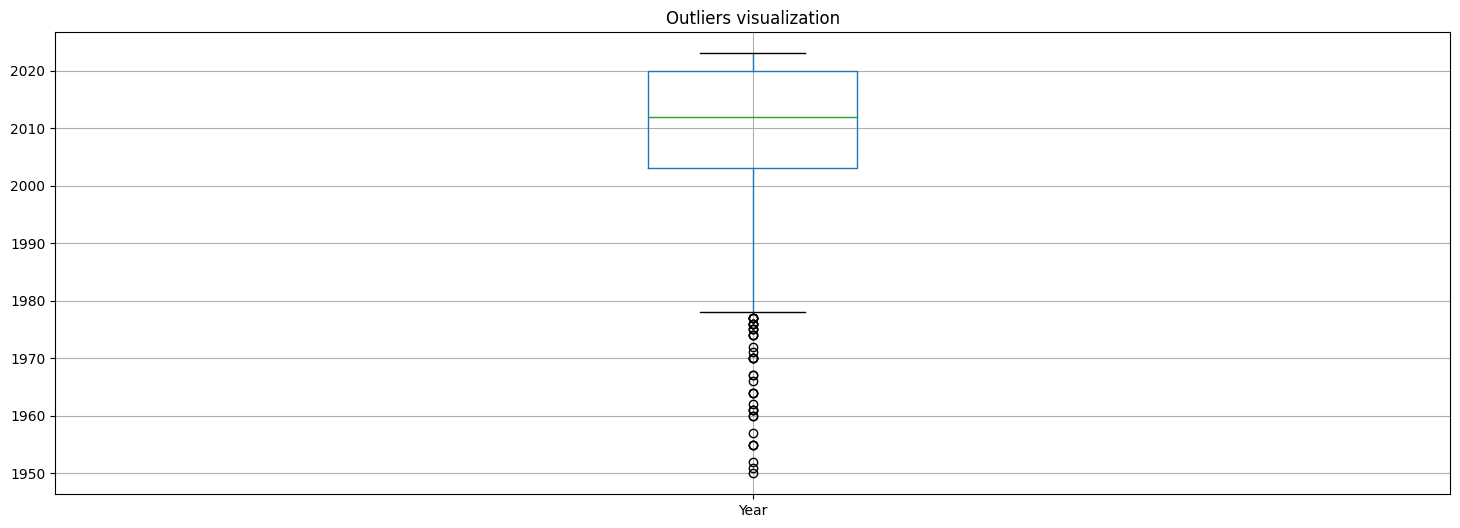

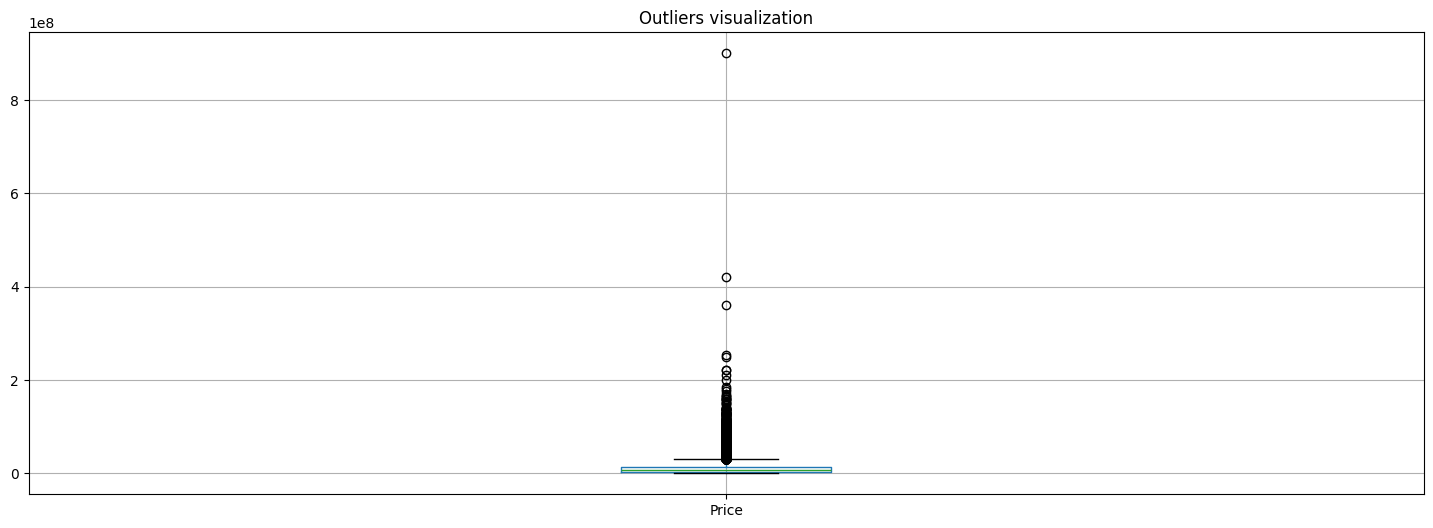

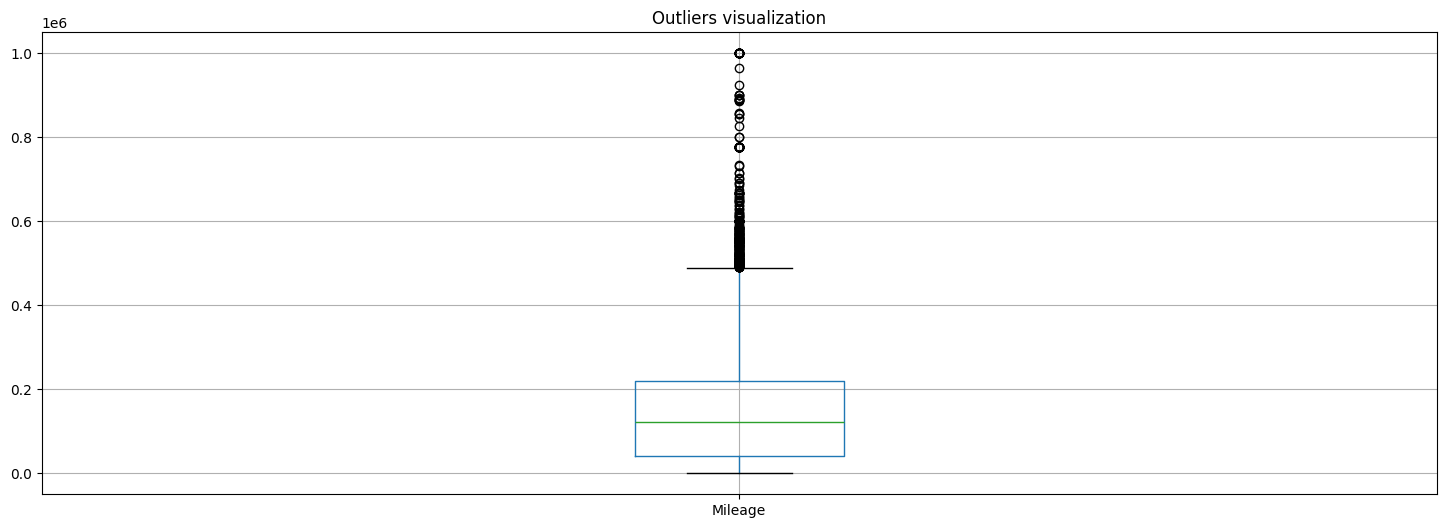

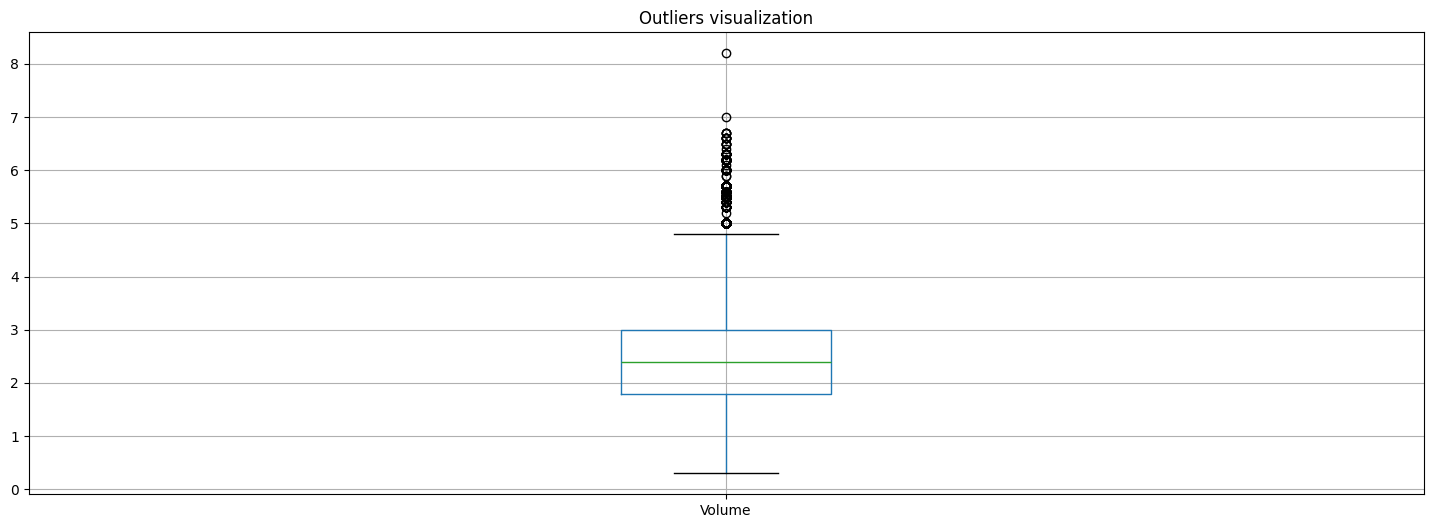

In [10]:
cat_col = ['Year', 'Price', 'Mileage', 'Volume']
for col in cat_col:
    plt.subplots(figsize=(18,6))
    plt.title("Outliers visualization")
    df.boxplot(column=col, return_type='axes')

***After exploring outliers information we drop the certain amount of rows***

In [11]:
#Since Year and Price columns have no missing values we use the following procedure
df = df[(df.Year > 1980)]
df = df[(df.Price < 50000000)]

In [12]:
#Volume and Mileage columns have a huge number of missing values, then we drop them by obtaining indexes***
df = df.drop(df[(df['Volume'] > 4.8)].index)
df = df.drop(df[(df['Mileage'] > 480000)].index)

In [13]:
#Checking the info about dataframe after above operations
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30116 entries, 0 to 32224
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             30116 non-null  object 
 1   Name              30107 non-null  object 
 2   Price             30116 non-null  int64  
 3   Year              30116 non-null  int64  
 4   City              30116 non-null  object 
 5   Car case          30114 non-null  object 
 6   Volume            29308 non-null  float64
 7   Transmission      30108 non-null  object 
 8   Mileage           21052 non-null  float64
 9   Gear              30105 non-null  object 
 10  Steer wheel       30116 non-null  object 
 11  Color             25410 non-null  object 
 12  Custom clearance  30116 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 3.2+ MB


***Printing the number of Null values of each column***

In [14]:
df.isnull().sum()

Brand                  0
Name                   9
Price                  0
Year                   0
City                   0
Car case               2
Volume               808
Transmission           8
Mileage             9064
Gear                  11
Steer wheel            0
Color               4706
Custom clearance       0
dtype: int64

***Plotting the histogramms for each object and numerical type column***

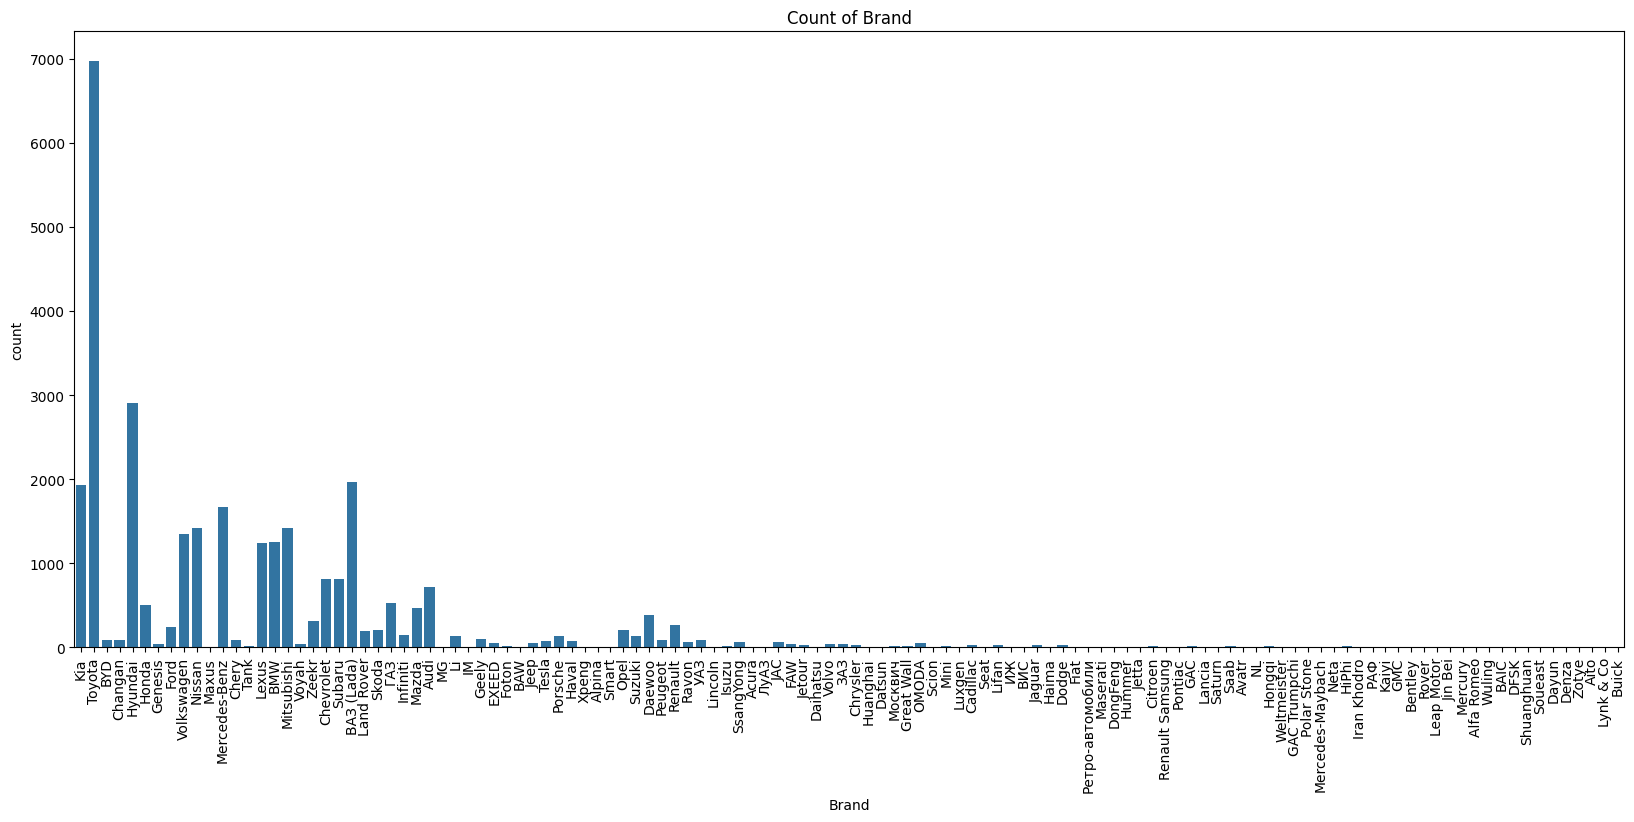

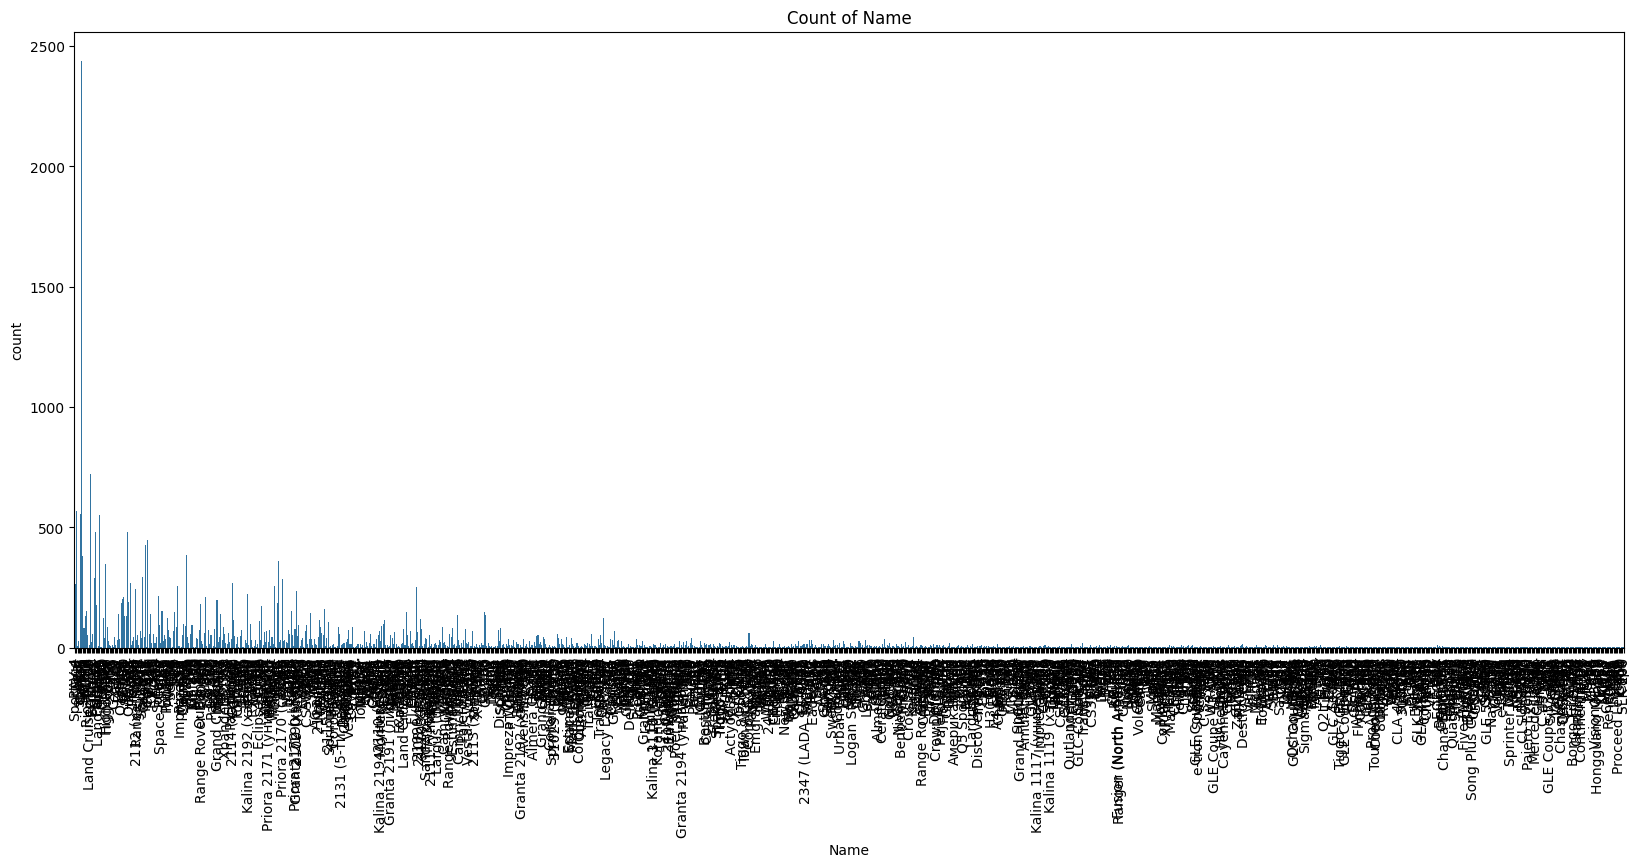

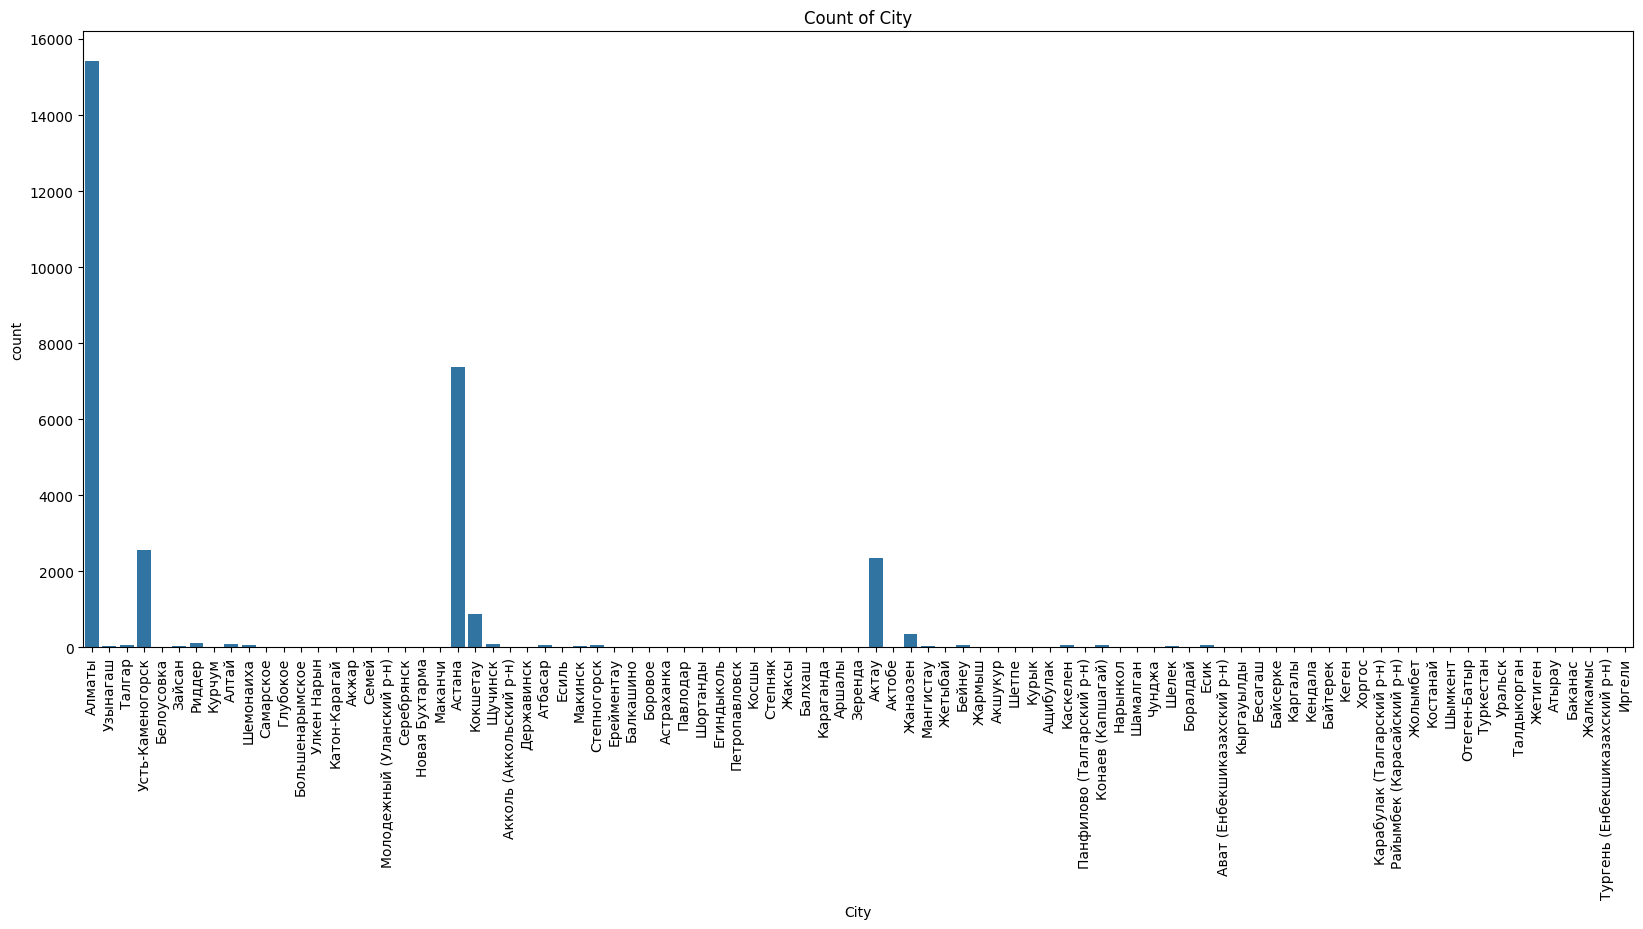

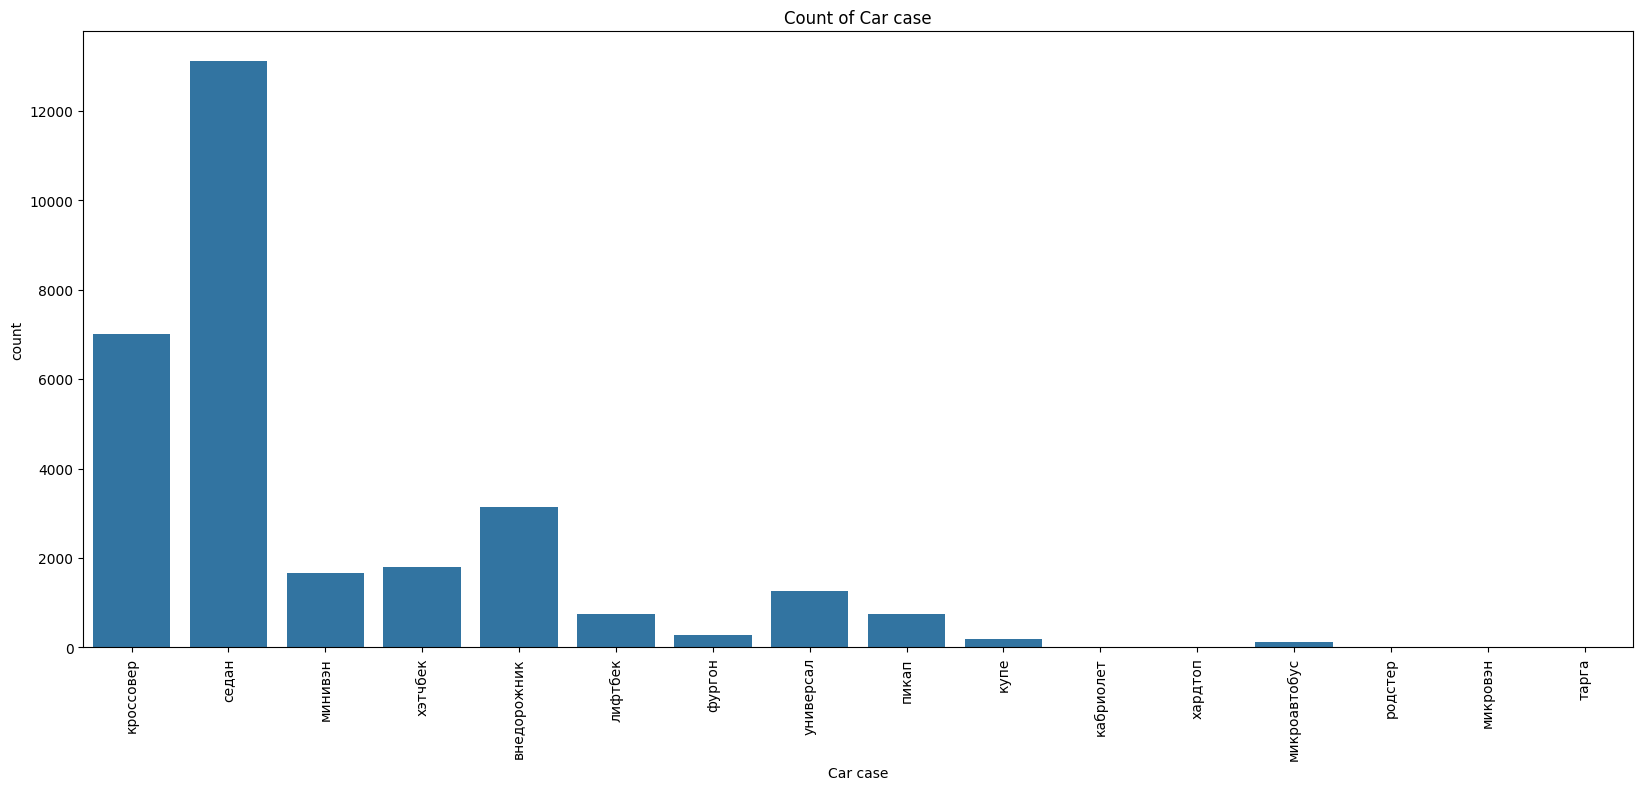

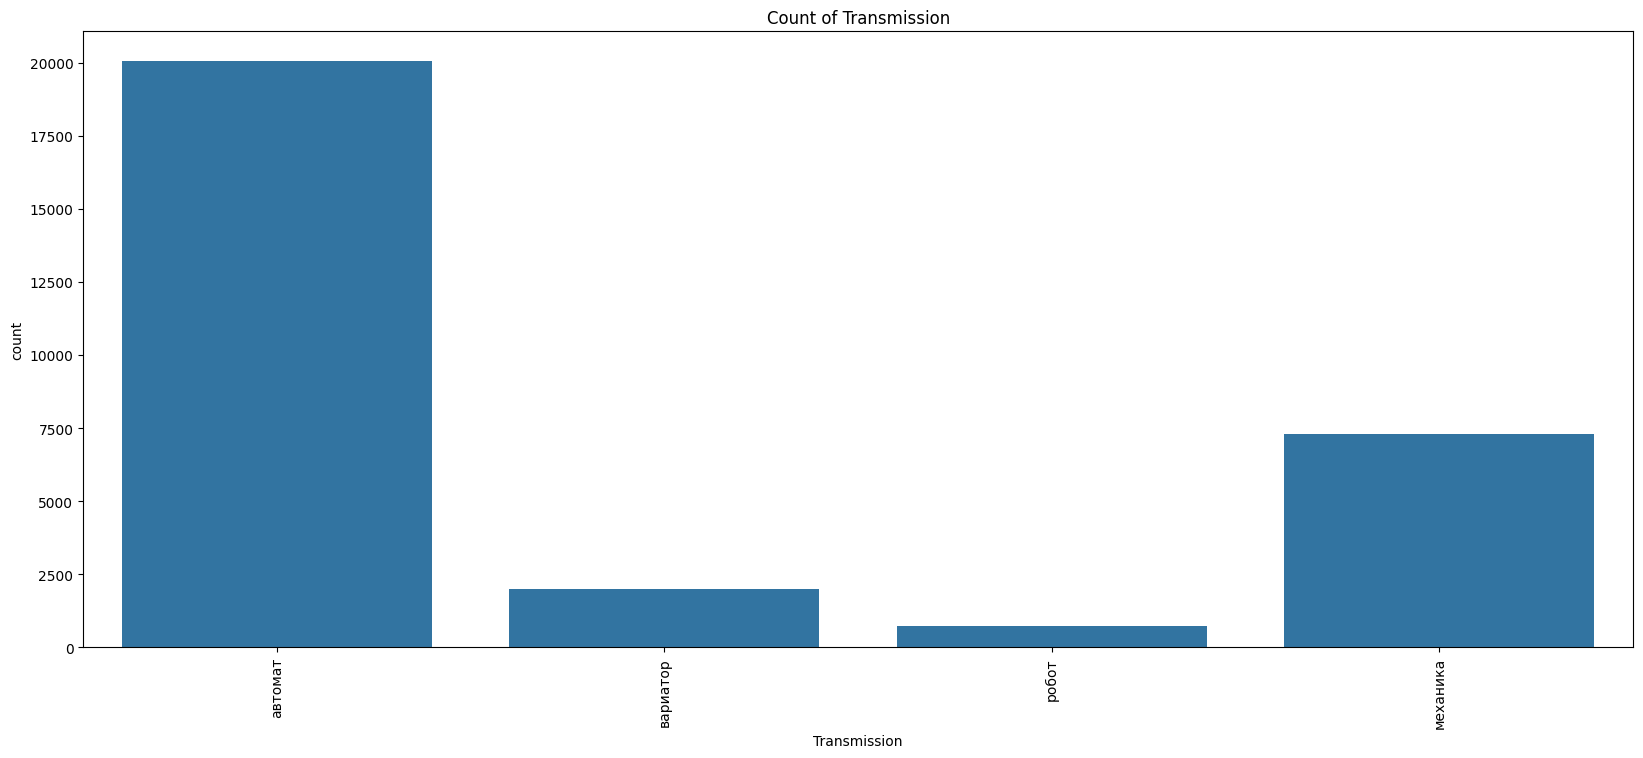

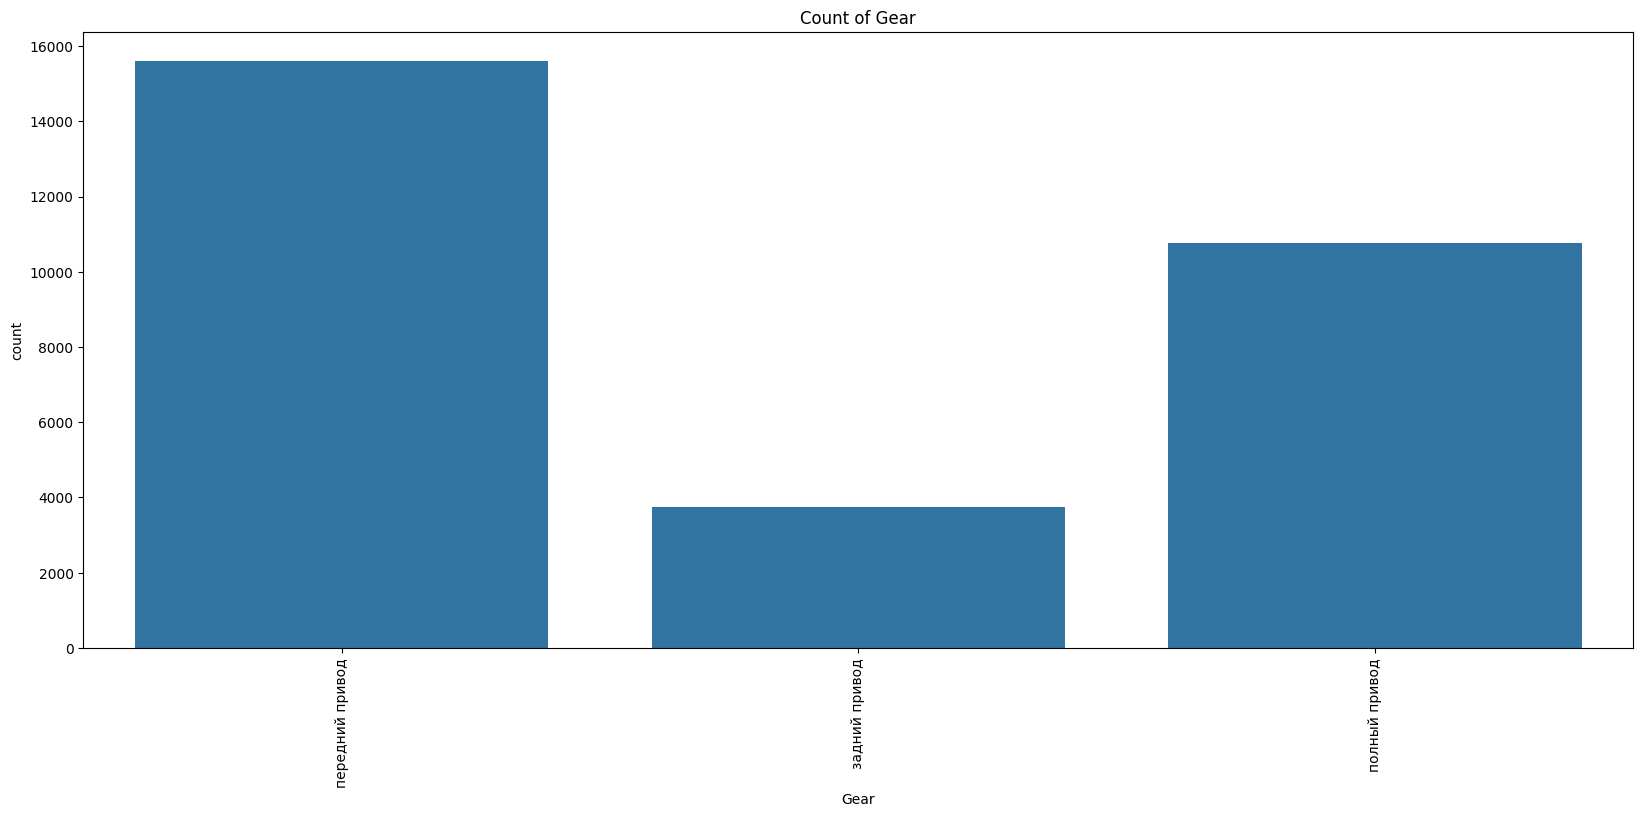

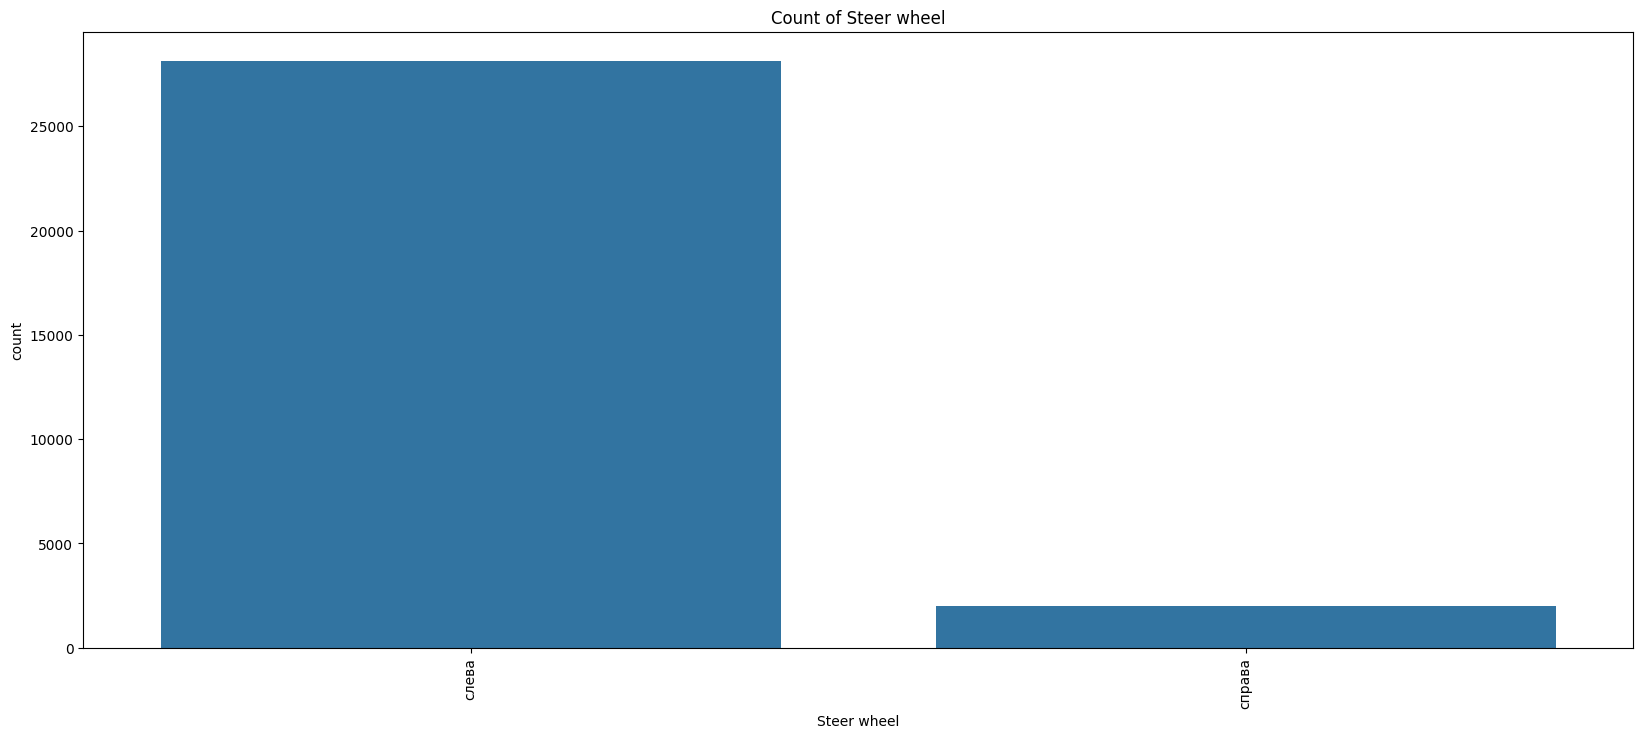

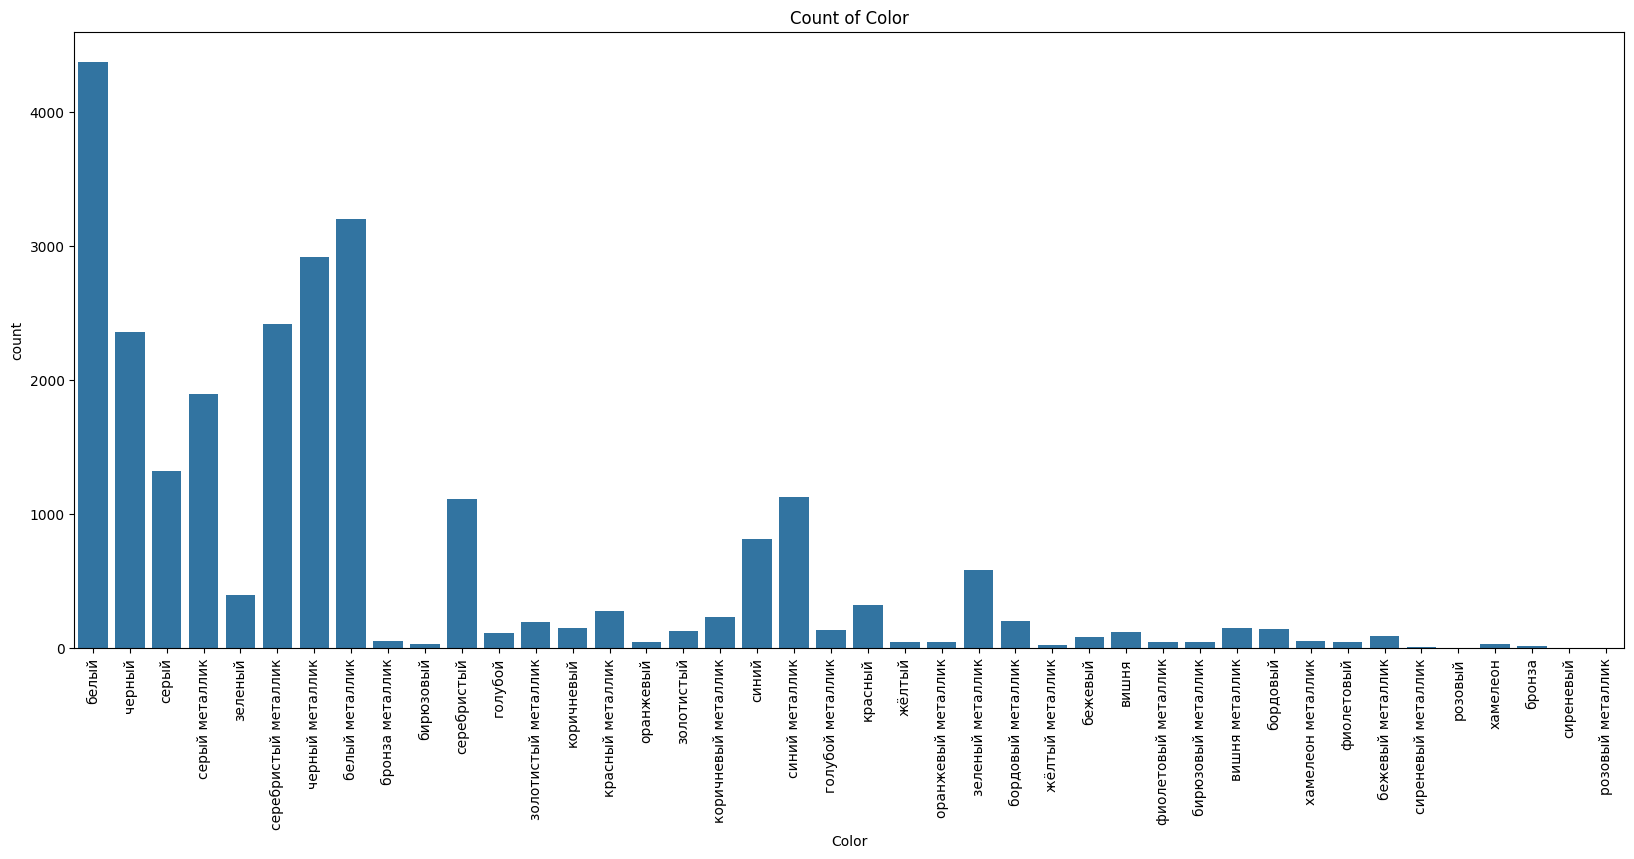

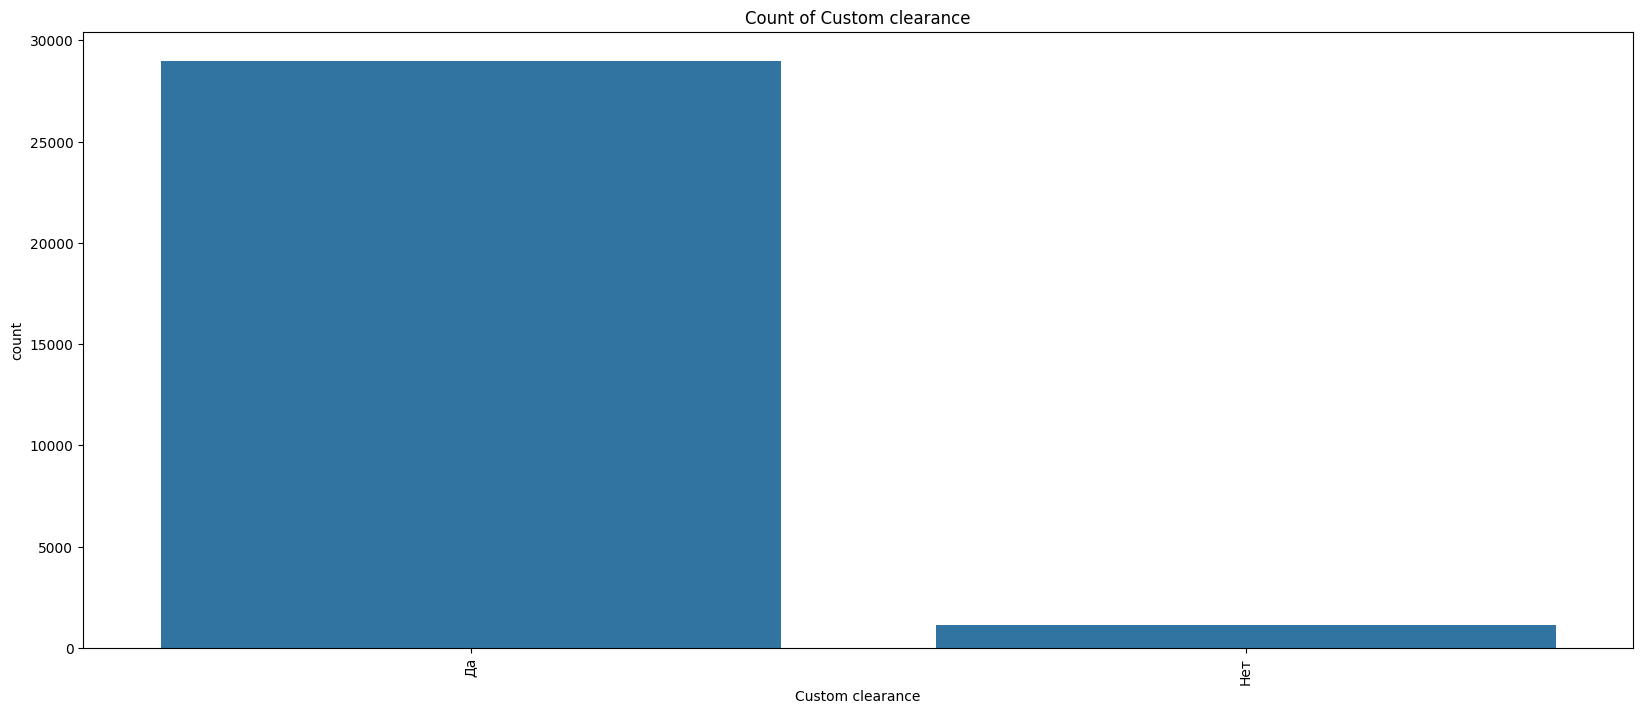

In [15]:
for column_name in df.columns:
    if df[column_name].dtype == 'object':
        plt.figure(figsize=(20, 8))  
        sns.countplot(x=column_name, data=df)
        plt.title(f'Count of {column_name}')
        plt.xticks(rotation=90) 
        plt.show()

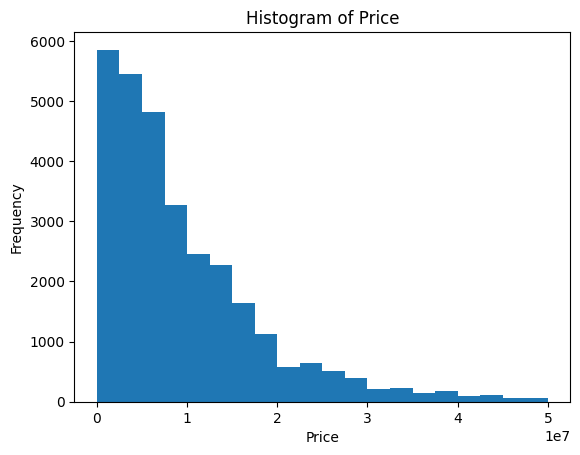

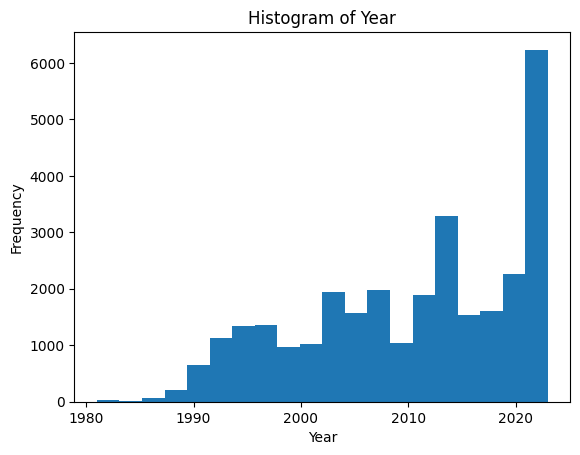

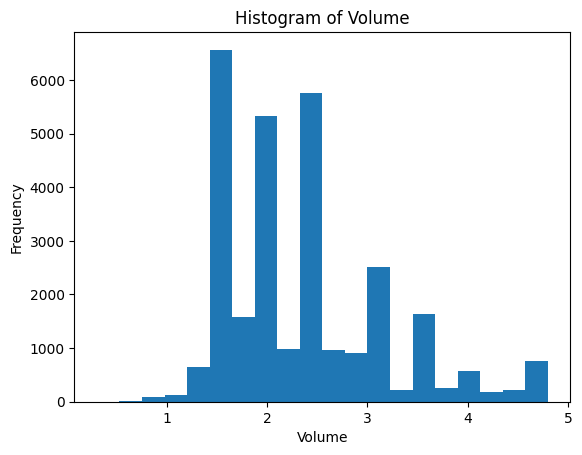

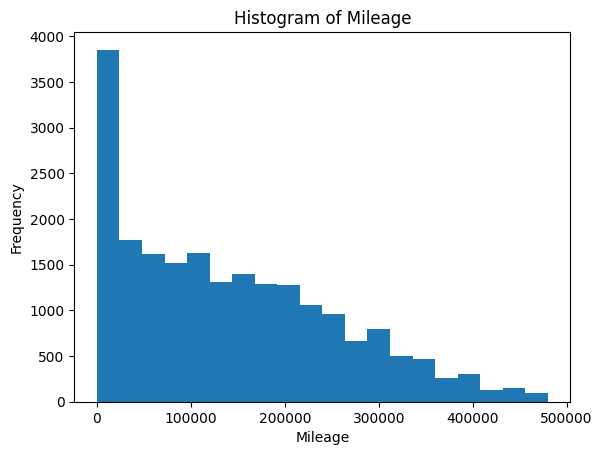

In [16]:
for column_name in df.columns:
    if df[column_name].dtype in ['int64', 'float64']:  # Check if it's a numerical column
        plt.hist(df[column_name], bins=20)  # Adjust the number of bins as needed
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.show()

***Droping specific columns after analyzing the above graphs***

In [17]:
df = df.drop(columns=['City', 'Custom clearance', 'Steer wheel'], axis=1)

***Printing the rows where value in Name column is NaN***

In [18]:
null_names = df[df['Name'].isna()]
null_names

,Brand,Name,Price,Year,Car case,Volume,Transmission,Mileage,Gear,Color
14467,Mercedes-Benz,NaN,6000000,1997,седан,3.2,автомат,430000.0,задний привод,черный металлик
17627,ВАЗ (Lada),NaN,4800000,2019,седан,1.6,робот,70000.0,передний привод,белый
17717,Smart,NaN,3300000,2004,хэтчбек,1.3,механика,225000.0,передний привод,зеленый металлик
20137,BYD,NaN,16900000,2023,кроссовер,NaN,автомат,50.0,передний привод,белый металлик
20715,Volkswagen,NaN,48999999,2023,минивэн,2.0,робот,4000.0,полный привод,синий металлик
22210,ВАЗ (Lada),NaN,1550000,2010,хэтчбек,1.6,механика,179000.0,передний привод,серый металлик
24006,ВАЗ (Lada),NaN,1100000,2012,хэтчбек,1.4,механика,140000.0,передний привод,NaN
25490,Kia,NaN,1200000,1998,внедорожник,2.0,механика,NaN,полный привод,NaN
25959,BMW,NaN,10000000,2012,седан,3.0,автомат,120000.0,задний привод,белый


***Dropping above rows***

In [19]:
df.dropna(subset=['Name'], inplace=True)
df.isna().sum()

Brand              0
Name               0
Price              0
Year               0
Car case           2
Volume           807
Transmission       8
Mileage         9063
Gear              11
Color           4704
dtype: int64

***Filling the missing values***

In [20]:
columns_to_fill = ['Car case', 'Transmission', 'Gear', 'Color']
for column in columns_to_fill:
    mode_value = df[column].mode()[0]  # Calculate the mode of the column
    df[column].fillna(mode_value, inplace=True)
df.isna().sum()

Brand              0
Name               0
Price              0
Year               0
Car case           0
Volume           807
Transmission       0
Mileage         9063
Gear               0
Color              0
dtype: int64

In [21]:
df.loc[df['Year'] == 2023, 'Mileage'] = 0

mean_mileage = df['Mileage'].mean()
df['Mileage'].fillna(mean_mileage, inplace=True)
df.isna().sum()

Brand             0
Name              0
Price             0
Year              0
Car case          0
Volume          807
Transmission      0
Mileage           0
Gear              0
Color             0
dtype: int64

In [22]:
null_names = df[df['Volume'].isna()]
null_names['Name'].unique()

array(['Seal', 'EQC', '001', 'iX3', 'Han', 'LS7', 'X', 'Free', 'ID.4',
       'Model Y', 'i3', 'e-Bora', 'G9', 'bZ4X', 'CR-V',
       'Land Cruiser Prado', 'Leaf', 'e:NS1', 'Carina E', 'Benben E-Star',
       'Model 3', 'Tang', 'ID.6', 'Dream', 'M-NV', 'Model X', 'Song',
       'Yuan', 'E2', 'Ariya', 'Astra', '11', 'Taycan', 'F200',
       'e-tron Sportback', 'e:NP1', 'W6', 'Granvia', 'i4', '009',
       'Model S', 'GT', 'E-HS9', 'Z', 'Qin', 'Seagull', 'Aion Y', 'Y',
       'Q2L e-tron', 'EV6', 'Dolphin', 'RZ 450e', 'C11', 'e-tron', 'EQE',
       'iX', 'EQE SUV', 'I-Pace', 'EU5', 'Song Plus Champion', 'Kona',
       'GV60', 'e-Lavida', 'ES3', 'Lyriq', 'N7', 'D9', 'P7', 'ID.3',
       'Chasing Light', 'Q4 e-tron', 'U', 'Bongo', 'Space Wagon', 'V',
       'Twizy', 'Airtrek', '#1', 'Menlo', 'M5 EV', 'Hongguang Mini EV',
       'Golf', '323'], dtype=object)

In [23]:
petrol_cars = ['Land Cruiser Prado', 'Carina E', 'Kona', '323', 'Space Wagon', 'Golf', 'GT']
electric_cars = [x for x in null_names['Name'].unique() if x not in petrol_cars]
len(electric_cars)

76

In [24]:
# Replace NA values in the 'Volume' column based on car type
df['Volume'] = np.where(df['Name'].isin(electric_cars), 0, df['Volume'].fillna(df['Volume'].mean()))
df.isna().sum()

Brand           0
Name            0
Price           0
Year            0
Car case        0
Volume          0
Transmission    0
Mileage         0
Gear            0
Color           0
dtype: int64

In [25]:
#We save the dataframe after data preprocessing, we do it for futher application in Tkinter block
df.to_csv('data_preprop.csv', index=False)

***Label encoder***

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # Store label encoders for each object-type column

# Preprocess your training data
for col in df.select_dtypes(include = ['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
df

,Brand,Name,Price,Year,Car case,Volume,Transmission,Mileage,Gear,Color
0,56,981,8580000,2013,2,2.0,0,218514.0,1,2
1,101,854,13060000,2017,2,2.0,1,72869.0,1,40
2,9,945,14250000,2023,10,0.0,0,0.0,0,2
3,13,1069,14500000,2023,2,1.5,3,0.0,1,30
4,44,969,26000000,2022,10,2.5,0,70000.0,1,31
...,...,...,...,...,...,...,...,...,...,...
32220,69,249,4000000,2006,2,2.3,0,233000.0,1,2
32221,44,142,7612049,2021,10,1.4,2,58600.0,1,2
32222,44,399,7800000,2018,10,2.0,0,40225.0,1,31
32223,103,917,5450000,2007,10,2.5,0,180000.0,1,31


***Dividing the dataset into target and feature datasets***

In [27]:
Y = df['Price']
X = df.drop('Price', axis=1)
X

,Brand,Name,Year,Car case,Volume,Transmission,Mileage,Gear,Color
0,56,981,2013,2,2.0,0,218514.0,1,2
1,101,854,2017,2,2.0,1,72869.0,1,40
2,9,945,2023,10,0.0,0,0.0,0,2
3,13,1069,2023,2,1.5,3,0.0,1,30
4,44,969,2022,10,2.5,0,70000.0,1,31
...,...,...,...,...,...,...,...,...,...
32220,69,249,2006,2,2.3,0,233000.0,1,2
32221,44,142,2021,10,1.4,2,58600.0,1,2
32222,44,399,2018,10,2.0,0,40225.0,1,31
32223,103,917,2007,10,2.5,0,180000.0,1,31


***Feature scaling***

In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.50244191,  1.21278863,  0.28148063, ...,  0.85183164,
        -0.3556517 , -1.08644039],
       [ 0.9017676 ,  0.83570604,  0.68317934, ..., -0.61866631,
        -0.3556517 ,  1.35813595],
       [-1.96906072,  1.10589908,  1.28572741, ..., -1.35438478,
        -1.88465438, -1.08644039],
       ...,
       [-0.87689777, -0.51525917,  0.78360402, ..., -0.94825494,
        -0.3556517 ,  0.77915735],
       [ 0.96417691,  1.02276276, -0.32106744, ...,  0.46297683,
        -0.3556517 ,  0.77915735],
       [ 1.1826095 ,  0.72287817,  0.38190531, ...,  0.17017969,
        -0.3556517 ,  1.42246691]])

***Obtaining train and test datasets***

In [29]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)
X_train

array([[ 0.77694897,  1.77098964,  0.8840287 , ..., -0.34473944,
         1.17335098,  0.71482639],
       [ 0.9017676 , -0.36680145,  0.28148063, ..., -0.34473944,
         1.17335098,  1.35813595],
       [ 0.9017676 ,  0.2210911 ,  0.58275466, ...,  0.02882934,
         1.17335098, -1.08644039],
       ...,
       [ 1.1826095 , -1.59603134,  0.28148063, ...,  1.27069311,
        -0.3556517 , -1.08644039],
       [ 0.9017676 ,  0.83570604,  0.58275466, ..., -0.62744013,
         1.17335098,  1.35813595],
       [-0.34641863,  0.18546125,  1.28572741, ..., -1.35438478,
         1.17335098, -1.08644039]])

# Model implementation

***Linear Regression Model***

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = model_lr.predict(X_test)

# Calculate the model's accuracy using metrics like Mean Squared Error (MSE) and R-squared (R2)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error (MSE) for Linear Regression Model: {mse_lr}")
print(f"R-squared (R2) Score for Linear Regression Model: {r2_lr}")

Mean Squared Error (MSE) for Linear Regression Model: 30832859581385.902
R-squared (R2) Score for Linear Regression Model: 0.60169577623327


***Decision Tree Classifier Model***

In [31]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()

# Train the model on the training data
clf_dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = clf_dt.predict(X_test)

# Evaluate the model
print(f"R-squared (R2) Score for Decision Tree Classifier Model: {r2_score(y_test, y_pred_dt)}")

R-squared (R2) Score for Decision Tree Classifier Model: 0.8295838149840938


***k-Nearest Neighbors (K-NN) model***

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-NN Classifier with a specified number of neighbors (k)
k = 5  # You can adjust the value of k
clf_knn = KNeighborsClassifier(n_neighbors=k)

# Train the model on the training data
clf_knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = clf_knn.predict(X_test)

# Evaluate the model
print(f"R-squared (R2) Score for K-NN Model: {r2_score(y_test, y_pred_knn)}")

R-squared (R2) Score for K-NN Model: 0.72935526558589


# Application

In [35]:
import tkinter as tk
from tkinter import messagebox
from unidecode import unidecode

data = pd.read_csv('data_preprop.csv')
def predict_price():
    # Get user inputs
    brand = brand_entry.get()
    name = name_entry.get()

    if not brand or not name:
        messagebox.showerror("Error", "Both 'Brand' and 'Name' labels must be filled.")
        return

    user_input = {
        'Brand': brand,
        'Name': name,
        'Year': float(year_entry.get() or data['Year'].mean()),
        'Car case': car_case_entry.get() or data['Car case'].mode()[0],
        'Volume': float(volume_entry.get() or data['Volume'].mean()),
        'Transmission': transmission_entry.get() or data['Transmission'].mode()[0],
        'Mileage': float(mileage_entry.get() or data['Mileage'].mean()),
        'Gear': gear_entry.get()or data['Gear'].mode()[0],
        'Color': color_entry.get() or data['Color'].mode()[0]
    }
    
    # Encode user input using label encoders
    categorical_cols = ['Brand', 'Name', 'Car case', 'Transmission', 'Gear', 'Color']
    for col in categorical_cols: 
        if user_input[col] in label_encoders[col].classes_:
            user_input[col] = label_encoders[col].transform([user_input[col]])[0]
    
    # Create a DataFrame from user input
    user_data = pd.DataFrame([user_input])
    user_data = scaler.transform(user_data)
    # Make a price prediction
    predicted_price_lr = model_lr.predict(user_data)[0]
    predicted_price_dt = clf_dt.predict(user_data)[0]
    predicted_price_knn = clf_knn.predict(user_data)[0]

    # Display the predicted price
    result_label1.config(text=f"Predicted Price by Linear Regression: {predicted_price_lr:,.0f}".replace(',', ' ') + " ₸")
    result_label2.config(text=f"Predicted Price by Decision Tree: {predicted_price_dt:,.0f}".replace(',', ' ') + " ₸")
    result_label3.config(text=f"Predicted Price by K-NN: {predicted_price_knn:,.0f}".replace(',', ' ') + " ₸")

# Create a Tkinter window
window = tk.Tk()
window.title("Car Price Prediction")
window.geometry('700x500')
font = ("arial", 20, "bold")

# Convert the Pillow image to a PhotoImage
# photo = tk.PhotoImage(file = "koleso logo.png")
# photolabel = tk.Label(window, image=photo)
# photolabel.place(x = 500, y = 300)

# Create labels and entry fields for user input
brand_label = tk.Label(window, text="Brand:")
name_label = tk.Label(window, text="Name:")
year_label = tk.Label(window, text="Year:")
car_case_label = tk.Label(window, text="Car case:")
volume_label = tk.Label(window, text="Volume:")
transmission_label = tk.Label(window, text="Transmission:")
mileage_label = tk.Label(window, text="Mileage:")
gear_label = tk.Label(window, text="Gear:")
steer_wheel_label = tk.Label(window, text="Steer wheel:")
color_label = tk.Label(window, text="Color")

brand_entry = tk.Entry(window)
name_entry = tk.Entry(window)
year_entry = tk.Entry(window)
car_case_entry = tk.Entry(window)
volume_entry = tk.Entry(window)
transmission_entry = tk.Entry(window)
mileage_entry = tk.Entry(window)
gear_entry = tk.Entry(window)
steer_wheel_entry = tk.Entry(window)
color_entry = tk.Entry(window)

predict_button = tk.Button(window, text="Predict Price", command=predict_price)
result_label1 = tk.Label(window, text="Predicted Price:")
result_label2 = tk.Label(window)
result_label3 = tk.Label(window)

# Arrange labels and entry fields in the window
brand_label.grid(row=0, column=15)
name_label.grid(row=1, column=15)
year_label.grid(row=2, column=15)
car_case_label.grid(row=3, column=15)
volume_label.grid(row=4, column=15)
transmission_label.grid(row=5, column=15)
mileage_label.grid(row=6, column=15)
gear_label.grid(row=7, column=15)
color_label.grid(row=9, column=15)

brand_entry.grid(row=0, column=16)
name_entry.grid(row=1, column=16)
year_entry.grid(row=2, column=16)
car_case_entry.grid(row=3, column=16)
volume_entry.grid(row=4, column=16)
transmission_entry.grid(row=5, column=16)
mileage_entry.grid(row=6, column=16)
gear_entry.grid(row=7, column=16)
color_entry.grid(row=9, column=16)

predict_button.grid(row=10, column=16, columnspan=5)
result_label1.grid(row=11, column=16, columnspan=5)
result_label2.grid(row=12, column=16, columnspan=5)
result_label3.grid(row=13, column=16, columnspan=5)

# Start the Tkinter main loop
window.mainloop()